#### Hi all.  🙋

#### We continue our **Beginner-Intermediate Friendly Machine Learning series**, which would help anyone who wants to learn or refresh the basics of ML.

#### What we have covered: 

#### [Beginner Friendly Detailed Explained EDAs – For anyone at the beginnings of DS/ML journey](https://www.kaggle.com/general/253911#1393015) ✔️

#### [BIAS & VARIANCE TRADEOFF](https://www.kaggle.com/kaanboke/ml-basics-bias-variance-tradeoff) ✔️

#### [LINEAR ALGORITHMS](https://www.kaggle.com/kaanboke/ml-basics-linear-algorithms)  ✔️

#### [NONLINEAR ALGORITHMS](https://www.kaggle.com/kaanboke/nonlinear-algorithms)  ✔️

#### [The Most Used Methods to Deal with MISSING VALUES](https://www.kaggle.com/kaanboke/the-most-used-methods-to-deal-with-missing-values)  ✔️

#### [Beginner Friendly End to End ML Project- Classification with Imbalanced Data](https://www.kaggle.com/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy)  ✔️

#### [How to Prevent the Data Leakage ?](https://www.kaggle.com/kaanboke/how-to-prevent-the-data-leakage) ✔️

#### [The Most Common EVALUATION METRICS- A Gentle Intro](https://www.kaggle.com/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro) ✔️


#### In this notebook we will  cover one of the important concepts of the Data Science Journey : **Feature Selection**
#### Enjoy 🤘

![](https://miro.medium.com/max/1400/1*FUZS9K4JPqzfXDcC83BQTw.png)

Image Credit: https://miro.medium.com/

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [What is Feature Selection](#0)   
* [Data](#1)
* [Univariate Statistics-Filter Methods](#2)
    * [Removing features with low variance - Variance Threshold](#3)
    * [Select KBest for Classification Problems](#4)
    * [Select KBest for Regression Problems](#5)
    * [Information Gain - Classification Problems](#6)
    * [Information Gain- Regression Problems](#7)
    * [Select Percentile](#8)


* [Model-Based Feature Selection - Embedded](#9)
* [Iterative Feature Selection - Wrapper](#10)
* [Conclusion](#11)
* [References & Further Reading](#12)


<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>What is Feature Selection ?</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


> In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for several reasons:

> * simplification of models to make them easier to interpret by researchers/users,
> * shorter training times,
> * to avoid the curse of dimensionality,
> * improve data's compatibility with a learning model class,
> * encode inherent symmetries present in the input space.

Reference: https://en.wikipedia.org/wiki/Feature_selection

![](https://assets-global.website-files.com/5debb9b4f88fbc3f702d579e/60ecb081507f4559c84381f5_feature-selection-graphic.png)

image credit: https://www.omnisci.com/technical-glossary/feature-selection

Even though there are unsupervised feature selection techniques, in this study we will focus on the supervised feature selection techniques.

Let's see the three  main approaches of feature selection in the supervised learning.

![](https://www.researchgate.net/profile/Enis-Karaarslan/publication/337591149/figure/fig2/AS:830089595990017@1574920190654/The-main-feature-selection-methods-for-machine-learning.png)

Image Credit: https://www.researchgate.net/profile/Enis-Karaarslan/publication/337591149

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>
<font color="lightseagreen" size=+2.5><b>Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- In this study I'll use two dataset. One for classification problems and other one for the prediction problems.

### Car Price Dataset

In [9]:
df_car = pd.read_csv('CarPrice_Assignment.csv', usecols = ['price', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'horsepower','peakrpm', 'citympg', 'highwaympg'])
df_car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115,5500,18,22,17450.0


<a id="2"></a>
<font color="lightseagreen" size=+2.5><b>Univariate Statistics - Filter Methods</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Our main aim to find out statistically significant / meaningful relationship between features and target.
- In this part, we will look at the different methods under the filter methods.
    - Removing features with low variance - Variance Threshold
    - KBest models for both classification and regression problems
    - Information gain for both classification and regression problems
    - Select percentile

<a id="3"></a>
<font color="lightseagreen" size=+1><b>Removing features with low variance - Variance Threshold</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


Variance threshold allows us to set a minimum threshold for an accepted variance in each feature. As a default it removes all zero-variance features (same value in all samples).

In [11]:

X= df_car.drop('price', axis=1)
y= df_car['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)


vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)


,Feature,Variance
6,boreratio,0.073650
7,stroke,0.093854
2,carwidth,4.727567
3,carheight,6.107762
10,citympg,25.000000
0,wheelbase,29.000000
11,highwaympg,31.000000
1,carlength,58.000000
8,horsepower,236.000000
5,enginesize,256.000000


- None of our features have a zero variance, for that reason we didn't remove any of our features.

<a id="4"></a>
<font color="lightseagreen" size=+1><b>Select KBest for Classification Problems</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [12]:

X= df_heart.drop('DEATH_EVENT', axis=1)
y= df_heart['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)

Kbest_classif = SelectKBest(score_func=f_classif, k=6)
Kbest_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()



NameError: name 'df_heart' is not defined

- Based on the SelectKBest, ['age','ejection_fraction','serum_creatinine', 'serum_sodium','sex','time'] are selected.

In [13]:
# transform training set
X_train_classif = Kbest_classif.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_selected.shape: {}".format(X_train_classif.shape))
print()
# transform test data
X_test_classif = Kbest_classif.transform(X_test)

NameError: name 'Kbest_classif' is not defined

- Let's see the differences with the whole features and the selected 6 features by using Logistic Regression as a base model.

In [14]:

lor = LogisticRegression(solver='liblinear', random_state=0)
lor.fit(X_train, y_train)

print(f'Score with all features: {round(lor.score(X_test, y_test),4)}')

lor.fit(X_train_classif, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_classif, y_test),4)}')

ValueError: Unknown label type: 'continuous'

- In this example, by using only 6 features of the dataset, we got better score than by using whole features.
- We can suspect that maybe some of the features are uninformative and not providing much about the target variable.

<a id="5"></a>
<font color="lightseagreen" size=+1><b>Select KBest for Regression Problems</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Feature 0 : 61.269
Feature 1 : 116.937
Feature 2 : 206.713
Feature 3 : 0.507
Feature 4 : 335.167
Feature 5 : 468.579
Feature 6 : 59.07
Feature 7 : 0.219
Feature 8 : 271.304
Feature 9 : 1.668
Feature 10 : 167.594
Feature 11 : 180.56



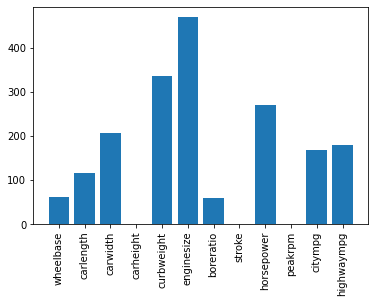

In [15]:

X= df_car.drop('price', axis=1)
y= df_car['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)

Kbest_reg = SelectKBest(score_func=f_regression, k=6)
Kbest_reg.fit(X_train, y_train)



# what are scores for the features
for i in range(len(Kbest_reg.scores_)):
    print(f'Feature {i} : {round(Kbest_reg.scores_[i],3)}')

print()


# plot the scores
plt.bar([X_train.columns[i] for i in range(len(Kbest_reg.scores_))], Kbest_reg.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()



In [16]:
# transform training set
X_train_reg = Kbest_reg.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_selected.shape: {}".format(X_train_reg.shape))
print()
# transform test data
X_test_reg = Kbest_reg.transform(X_test)

X_train.shape: (143, 12)

X_train_selected.shape: (143, 6)



In [17]:

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Score with all features: {round(lr.score(X_test, y_test),4)}')

lr.fit(X_train_reg, y_train)

print(f'Score with only selected features: {round(lr.score(X_test_reg, y_test),4)}')

Score with all features: 0.7879
Score with only selected features: 0.762


- Bu using only 6 of the features we couldn't get the better score. 
- Maybe other features on the dataset are informative about the target, we shoudl include them into our model.

<a id="6"></a>
<font color="lightseagreen" size=+1><b>Information Gain - Classification Problems</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [18]:

X= df_heart.drop('DEATH_EVENT', axis=1)
y= df_heart['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)

infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)

infogain_classif.fit(X_train, y_train)



# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],3)}')


print()

# plot the scores
plt.bar([X_train.columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()



NameError: name 'df_heart' is not defined

In [19]:
# transform training set
X_train_info_classif = infogain_classif.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print()

print("X_train_selected.shape: {}".format(X_train_info_classif.shape))
print()

# transform test data
X_test_info_classif = infogain_classif.transform(X_test)

NameError: name 'infogain_classif' is not defined

In [20]:

lor = LogisticRegression(solver='liblinear', random_state=0)
lor.fit(X_train, y_train)

print(f'Score with all features: {round(lor.score(X_test, y_test),4)}')

lor.fit(X_train_info_classif, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_info_classif, y_test),4)}')

ValueError: Unknown label type: 'continuous'

- In this example, by using only 6 features of the dataset, we got better score than by using whole features.
- We can suspect that maybe some of the features are uninformative and not providing much about the target variable.

<a id="7"></a>
<font color="lightseagreen" size=+1><b>Information Gain- Regression Problems</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Feature 0: 0.514622
Feature 1: 0.622888
Feature 2: 0.558591
Feature 3: 0.220527
Feature 4: 0.924030
Feature 5: 0.759176
Feature 6: 0.432761
Feature 7: 0.263727
Feature 8: 0.821519
Feature 9: 0.209828
Feature 10: 0.837633
Feature 11: 0.837735


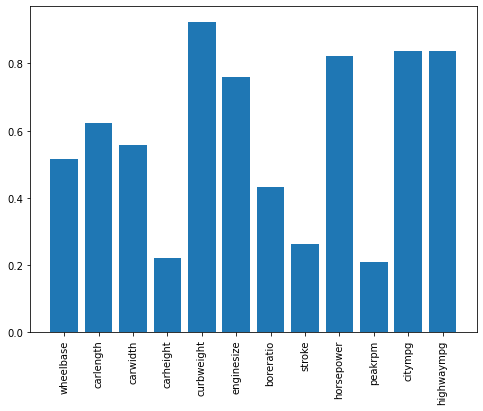

In [21]:

X= df_car.drop('price', axis=1)
y= df_car['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)

infogain_reg = SelectKBest(score_func=mutual_info_regression, k=6)

infogain_reg.fit(X_train, y_train)



# what are scores for the features
for i in range(len(infogain_reg.scores_)):
    print('Feature %d: %f' % (i, infogain_reg.scores_[i]))


# plot the scores
plt.bar([X_train.columns[i] for i in range(len(infogain_reg.scores_))], infogain_reg.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()



In [22]:
# transform training set
X_train_reg = infogain_reg.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_reg.shape: {}".format(X_train_reg.shape))
print()
# transform test data
X_test_reg = infogain_reg.transform(X_test)

X_train.shape: (143, 12)

X_train_reg.shape: (143, 6)



In [23]:

lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Score with all features: {round(lr.score(X_test, y_test),4)}')
lr.fit(X_train_reg, y_train)
print(f'Score with only selected features: {round(lr.score(X_test_reg, y_test),4)}')

Score with all features: 0.7879
Score with only selected features: 0.7752


<a id="8"></a>
<font color="lightseagreen" size=+1><b>Select Percentile</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [24]:
X= df_heart.drop('DEATH_EVENT', axis=1)
y= df_heart['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)

percentile = SelectPercentile(percentile=50)
percentile.fit(X_train, y_train)

NameError: name 'df_heart' is not defined

In [25]:
percentile.get_support()

NameError: name 'percentile' is not defined

In [26]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg'],
      dtype='object')

- We can see that **'age','ejection_fraction','serum_creatinine', 'serum_sodium', 'sex', 'time'** are selected by percentile.

In [27]:
# transform training set
X_train_percentile = percentile.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))

print()

print("X_train_selected.shape: {}".format(X_train_percentile.shape))
print()

# transform test data
X_test_percentile = percentile.transform(X_test)

NameError: name 'percentile' is not defined

In [28]:

lor = LogisticRegression(solver='liblinear', random_state=0)
lor.fit(X_train, y_train)

print(f'Score with all features: {round(lor.score(X_test, y_test),4)}')

lor.fit(X_train_percentile, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_percentile, y_test),4)}')

ValueError: Unknown label type: 'continuous'

- In this example, by using only 6 features of the dataset, we got better score than by using whole features.
- We can suspect that maybe some of the features are uninformative and not providing much about the target variable.

- In the filter model the selection of features is done as a preprocessing activity.
- We haven't tried to optimize the performance. 
- By using filter model,we select a subset of features that maximizes  model function.

<a id="9"></a>
<font color="lightseagreen" size=+2.5><b>Model-Based Feature Selection - Embedded</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Model based feature selection uses ML algortihms to determine the importance of the feature

- After then, it keeps the only important ones.
- We will use Random Forest Classifier to select the features
- We will continue to use Logistic Regression as our base model.

In [29]:
model_based_feature = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

X= df_heart.drop('DEATH_EVENT', axis=1)
y= df_heart['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)


model_based_feature.fit(X_train, y_train)

NameError: name 'df_heart' is not defined

In [30]:
model_based_feature.get_support()

ValueError: Either fit the model before transform or set "prefit=True" while passing the fitted estimator to the constructor.

In [31]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg'],
      dtype='object')

- We can see that **'age',''creatinine_phosphokinase',''ejection_fraction',''platelets',''serum_creatinine', 'time'** are selected by model.

In [32]:
# transform training set
X_train_mbf = model_based_feature.transform(X_train)
print(f'X_train.shape: {X_train.shape}')

print()

print(f'X_train_selected.shape: {X_train_mbf.shape}')
print()

# transform test data
X_test_mbf = model_based_feature.transform(X_test)

ValueError: Either fit the model before transform or set "prefit=True" while passing the fitted estimator to the constructor.

In [33]:
lor = LogisticRegression()
lor.fit(X_train_mbf, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_mbf, y_test),4)}')


NameError: name 'X_train_mbf' is not defined

- With the better feature selection, we also gained some improvements here.
- By using model based feature, even with base model Logistic Regression we get better result.

<a id="10"></a>
<font color="lightseagreen" size=+2.5><b>Iterative Feature Selection- Wrapper</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Iterative feature selection uses different models which have different subsets of future variables.
- One method, start wiith no features and add features one by one until the criteria defined by the user.
- Other method, which we use in our example, RFE (recursive feature elimination),
- RFE starts with the all the features and builds the model and eliminates the least important feature from the model.
- Just to remember that, since iterative-wrapper method builts several models, it is computationaly expensive to use.

In [34]:
rfe_features = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=6)

X= df_heart.drop('DEATH_EVENT', axis=1)
y= df_heart['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)


rfe_features.fit(X_train, y_train)

NameError: name 'df_heart' is not defined

In [35]:
rfe_features.get_support()

NotFittedError: This RFE instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [36]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg'],
      dtype='object')

- We can see that **'age',''creatinine_phosphokinase',''ejection_fraction',''platelets',''serum_creatinine', 'time'** are selected by iterative future selection.

In [37]:
# transform training set

X_train_rfe= rfe_features.transform(X_train)

print(f'X_train.shape: {X_train.shape}')

print()

print(f'X_train_selected.shape: {X_train_rfe.shape}')
print()

# transform test data
X_test_rfe= rfe_features.transform(X_test)

NotFittedError: This RFE instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [38]:

lor = LogisticRegression()
lor.fit(X_train_mbf, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_rfe, y_test),4)}')


NameError: name 'X_train_mbf' is not defined

- With the better feature selection, we also gained some improvements here.
- By using model based feature, even with base model Logistic Regression we get better result.

<a id="11"></a>
<font color="darkblue" size=+1.5><b>Conclusion & Which Method is the Best?</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Traditionaly, feature selection aims to improve accuracy and interpretability  
- We can add these aims also algorithmic training time and reducing memory footprint.
- Since we are dealing a large samples and thousands and thousand features, feature selection is one of the choice in our hands.
- No single data-reduction method can be best suited for all applications. 
- Available knowledge on the application is the one of the most important things which feature selection is based on.
- At the end there is no one best method to offer.
- We need to find out best features for our problem by using different methods and algorithms with the systematic experimentation.
- Even though in a real life cases, mostly we can not get large gains by applying feature selection, I can assure that it is valuable tool to have in your toolbox.


#### **By the way, when you like the topic, you can show it by supporting** 👍

####  **Feel free to leave a comment in the notebook**. 

#### All the best 🤘

- **Enjoy** 🤘

![](https://media.giphy.com/media/u1PvrqJWlY4OPSxDJ5/giphy-downsized-large.gif?cid=ecf05e47oo0ggho7d7xjvqnbs372rv1apu2eubitqk0ctt9d&rid=giphy-downsized-large.gif&ct=g)

<a id="12"></a>
<font color="darkblue" size=+1.5><b>References & Further Reading</b></font>


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


[Machine Learning - Beginner &Intermediate-Friendly BOOKS](https://www.kaggle.com/general/255972)